# CS224W: Machine Learning with Graphs - Homework 0
Fall 2019

## 1 Analyzing the Wikipedia voters network [27 points]
Download the Wikipedia voting network wiki-Vote.txt.gz: http://snap.stanford.edu/
data/wiki-Vote.html. <br>
Using one of the network analysis tools, load the Wikipedia voting network. Note that Wikipedia is a directed network. Formally, we consider the Wikipedia network as a directed graph G = (V, E), with node set V and edge set *E C V x V* where (edges are ordered pairs of nodes). An edge (a; b) belonging to E means that user a voted on user b. <br>
To make our questions clearer, we will use the following small graph as a running example:
Gsmall = (Vsmall;Esmall), where Vsmall = {1, 2, 3} and Esmall = {(1, 2), (2, 1), (1, 3), (1, 1)}.
Compute and print out the following statistics for the wiki-Vote network:

In [1]:
import snap

In [55]:
# Load wiki-vote network
G = snap.LoadEdgeList(snap.TNEANet, "data/wiki-Vote.txt", 0, 1)


In [4]:
# 1. The number of nodes in the network. (Gsmall has 3 nodes.)
print(G.GetNodes())

7115


In [6]:
# 2. The number of nodes with a self-edge (self-loop), i.e., the number of nodes a ∈ V where (a, a) ∈ E. 
# (G small has 1 self-edge.)
print(G.CntSelfEdges())

0


In [7]:
# 3. The number of directed edges in the network, i.e., the number of ordered pairs (a; b) ∈ E for which a != b. 
# (Gsmall has 3 directed edges.)

Count = G.CntUniqDirEdges()
print("Directed Graph: Count of unique directed edges is %d" % Count)


Directed Graph: Count of unique directed edges is 103689


In [8]:
# 4 The number of undirected edges in the network, i.e., the number of unique unordered pairs (a, b), a != b, for 
# which (a, b) ∈ E or (b, a) ∈ E (or both). If both (a, b) and (b, a) are edges, this counts a single undirected edge. 
# (G small has 2 undirected edges.)

Count = G.CntUniqUndirEdges()
print("Directed Graph: Count of unique undirected edges is %d" % Count)


Directed Graph: Count of unique undirected edges is 100762


In [9]:
# 5 The number of reciprocated edges in the network, i.e., the number of unique unordered pairs of nodes (a, b), 
# a != b, for which (a, b) ∈ E and (b, a) ∈ E. (G small has 1 reciprocated edge.)

Count = G.CntUniqBiDirEdges()
print("Directed Graph: Count of unique bidirectional edges is %d" % Count)

Directed Graph: Count of unique bidirectional edges is 2927


In [13]:
# 6 The number of nodes of zero out-degree. (G small has 1 node with zero out-degree.)

count = 0
for NI in G.Nodes():
#    print("node id %d with out-degree %d" % (NI.GetId(), NI.GetOutDeg()))
    d = NI.GetOutDeg()
    if d == 0:
        count = count + 1
print(count)

1005


In [18]:
# 7 The number of nodes of zero in-degree. (G small has 0 nodes with zero in-degree.)

DegToCntV = snap.TIntPrV()
snap.GetInDegCnt(G, DegToCntV)
for item in DegToCntV:
    if item.GetVal1()==0:
        count=item.GetVal2()
print(count)    


4734


In [19]:
# 8 The number of nodes with more than 10 outgoing edges (out-degree > 10). 

DegToCntV = G.GetOutDegCnt()

count = 0
for item in DegToCntV:
    if item.GetVal1() > 10:
        count= count + item.GetVal2()
print(count)    


1612


In [21]:
# 9 The number of nodes with more than 10 incoming edges (in-degree > 10). 

DegToCntV = G.GetInDegCnt()

count = 0
for item in DegToCntV:
    if item.GetVal1() < 10:
        count= count + item.GetVal2()
print(count)    


5165


## 2 Further Analyzing the Wikipedia voters network [33 points]

 Plot the distribution of out-degrees of nodes in the network on a log-log scale. Each data point is a pair (x, y) where x is a positive integer and y is the number of nodes in the network with out-degree equal to x. Restrict the range of x between the minimum and maximum out-degrees. You may filter out data points with a 0 entry. For the log-log scale, use base 10 for both x and y axes

In [23]:
import numpy as np
DegToCntV = G.GetOutDegCnt()
x = []
y = []
for item in DegToCntV:
    if item.GetVal1()>0:
        x.append(np.log10(item.GetVal1()))
        y.append(np.log10(item.GetVal2()))

Text(0.5, 1.0, 'Distribution of out-degrees')

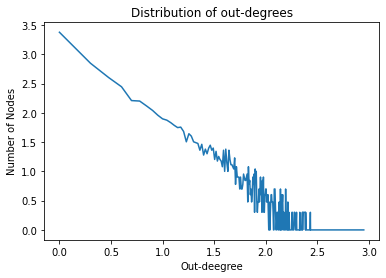

In [25]:
from matplotlib import pyplot
pyplot.plot(x,y)
pyplot.xlabel('Out-deegree')
pyplot.ylabel('Number of Nodes')
pyplot.title('Distribution of out-degrees')


Compute and plot the least-square regression line for the out-degree distribution in the log-log scale plot. Note we want to find coefficients a and b such that the function log10(y) = a · log10(x) + b, equivalently, y = 10^b · x^a , best fits the out-degree distribution. What are the coefficients a and b? For this part, you might want to use the method called polyfit in NumPy with deg parameter equal to 1. 

In [26]:
# Polyfit is a numpy function that computes a least squares polynomial for a given set of data. 
# Polyfit generates the coefficients of the polynomial, which can be used to model a curve to fit the data.
a,b = np.polyfit(x, y, 1)
print(a,b)

-1.2810647056745657 3.1324547044999123


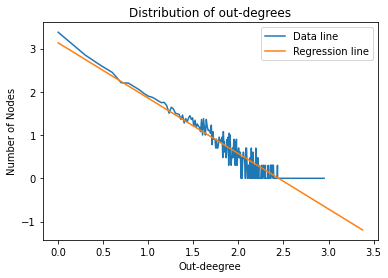

In [28]:
pyplot.plot(x,y)
pyplot.xlabel('Out-deegree')
pyplot.ylabel('Number of Nodes')
pyplot.title('Distribution of out-degrees')

x2=np.linspace(min(x),max(y),100)
pyplot.plot(x2, a*x2+b)
pyplot.legend(['Data line','Regression line'])

## 3 Finding Experts on the Java Programming Language on StackOverow [40 points]

Download the StackOverow network stackoverflow-Java.txt.gz: http://snap.stanford.edu/class/cs224w-data/hw0/stackoverflow-Java.txt.gz. <br> An edge (a, b) in the network means that person a endorsed an answer from person b on a Java-related question. <br>Using one of the network analysis tools, load the StackOverflow network. Note that StackOverflow is a directed network. Compute and print out the following statistics for the stackoverflow-Java network:

In [56]:
# Load wiki-vote network
G1 = snap.LoadEdgeList(snap.TNEANet, "data/stackoverflow-Java.txt", 0, 1)

In [34]:
# 1. The number of weakly connected components in the network. This value can be calculated in Snap.py via 
# function GetWccs.
Components = G1.GetWccs()
Components.Len()


10143

In [36]:
# 2. The number of edges and the number of nodes in the largest weakly connected component. The largest weakly 
# connected component is calculated in Snap.py with function GetMxWcc.
G1_MxWcc = G1.GetMxWcc()
G1_MxWcc.GetNodes(), G1_MxWcc.GetEdges()

(131188, 347297)

In [48]:
# 3. IDs of the top 3 most central nodes in the network by PagePank scores. PageRank scores are calculated in Snap.py 
# with function GetPageRank.
PageRankscores = G1.GetPageRank() # Hash where keys are int node ids, values are float PageRank scores.

# sort scores by descending order
sorted_PageRankscores = {k: v for k, v in sorted(PageRankscores.items(), key=lambda x: x[1], reverse = True)}
list(sorted_PageRankscores.keys())[:3]

[992484, 135152, 139985]

In [53]:
# 4. IDs of the top 3 hubs and top 3 authorities in the network by HITS scores. HITS scores are calculated in Snap.py 
# with function GetHits.
import pandas as pd

HubsScores, AuthScores = G1.GetHits() # returns 2 hashes with the Hubs and Authorities score of every node (keys are int node ids; values are float hub/authorities scores)

hubs_list=[]
aths_list=[]

for item in HubsScores:
    hubs_list.append([item, HubsScores[item]])   
for item in AuthScores:
    aths_list.append([item, AuthScores[item]])

hubs=pd.DataFrame(hubs_list, columns=['Node','HITS']).sort_values(by='HITS',ascending=0)
aths=pd.DataFrame(aths_list, columns=['Node','HITS']).sort_values(by='HITS',ascending=0)

print(hubs[:3])
print(aths[:3])

         Node      HITS
18949  614141  0.258938
9983   240337  0.179521
4404   100516  0.169554
        Node      HITS
1594  157882  0.799060
1027   22656  0.312252
8146  203907  0.216612
